dataset : https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset

Nama: Muhammad Rifan Fathoni
NIM:2209106003
Kelas:A1'22

#Import dataset

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import os
import pathlib
import matplotlib.pyplot as plt

#unzip file dataset

In [16]:
!unzip 'dataset'

Archive:  dataset.zip
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (10).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (100).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (11).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (12).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (13).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (14).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (15).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (16).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (17).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (18).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (19).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (2).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (20).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (21).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (22).png  
  i

#melakukn split dataset

In [17]:
!pip install split-folders
import splitfolders
import os

# Check the contents of the source directory
source_dir = "Grapevine_Leaves_Image_Dataset"
print("List of files and subdirectories in the source directory:")
print(os.listdir(source_dir))

output_dir = "dataset_final"
seed = 1337
ratios = (0.8, 0.1, 0.1)

splitfolders.ratio(source_dir, output=output_dir, seed=seed, ratio=ratios)

List of files and subdirectories in the source directory:
['Ala_Idris', 'Dimnit', 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt', 'Nazli', 'Ak', 'Buzgulu']


Copying files: 500 files [00:00, 1673.37 files/s]


#image augmentation

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        validation_split = 0.2,
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [19]:
train_generator= train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
val_generator= train_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [20]:
images, labels = train_generator.next()
len(images), len(labels), images[0].shape

(32, 32, (150, 150, 3))

membuat model CNN dengan sequential

In [21]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(32,(3,3), activation = 'relu',padding='same', input_shape = (150,150,3)),
    MaxPool2D((2,2),strides=2,padding = 'same'),
    Conv2D(64,(3,3), activation = 'relu',padding='same'),
    MaxPool2D((2,2),strides=2,padding = 'same'),
    Conv2D(128,(3,3), activation = 'relu',padding='same'),
    # 2. fully connected layer
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(5, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

hist=model.fit(train_generator,epochs=20,
          validation_data =val_generator,
          verbose=1)

Epoch 1/20
13/13 [==============================] - 18s 361ms/step - loss: 2.4099 - accuracy: 0.2025 - val_loss: 1.6148 - val_accuracy: 0.2000
Epoch 2/20
13/13 [==============================] - 6s 452ms/step - loss: 1.6128 - accuracy: 0.1975 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 3/20
13/13 [==============================] - 5s 347ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/20
13/13 [==============================] - 6s 434ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/20
13/13 [==============================] - 6s 469ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 6/20
13/13 [==============================] - 4s 340ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6093 - val_accuracy: 0.2000
Epoch 7/20
13/13 [==============================] - 5s 369ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6092 - val_accuracy: 0.2000
Epoch

#akurasi

In [22]:
model.evaluate(val_generator)

2/2 [==============================] - 1s 200ms/step - loss: 1.6094 - accuracy: 0.2000


[1.6094489097595215, 0.20000000298023224]

#grafik

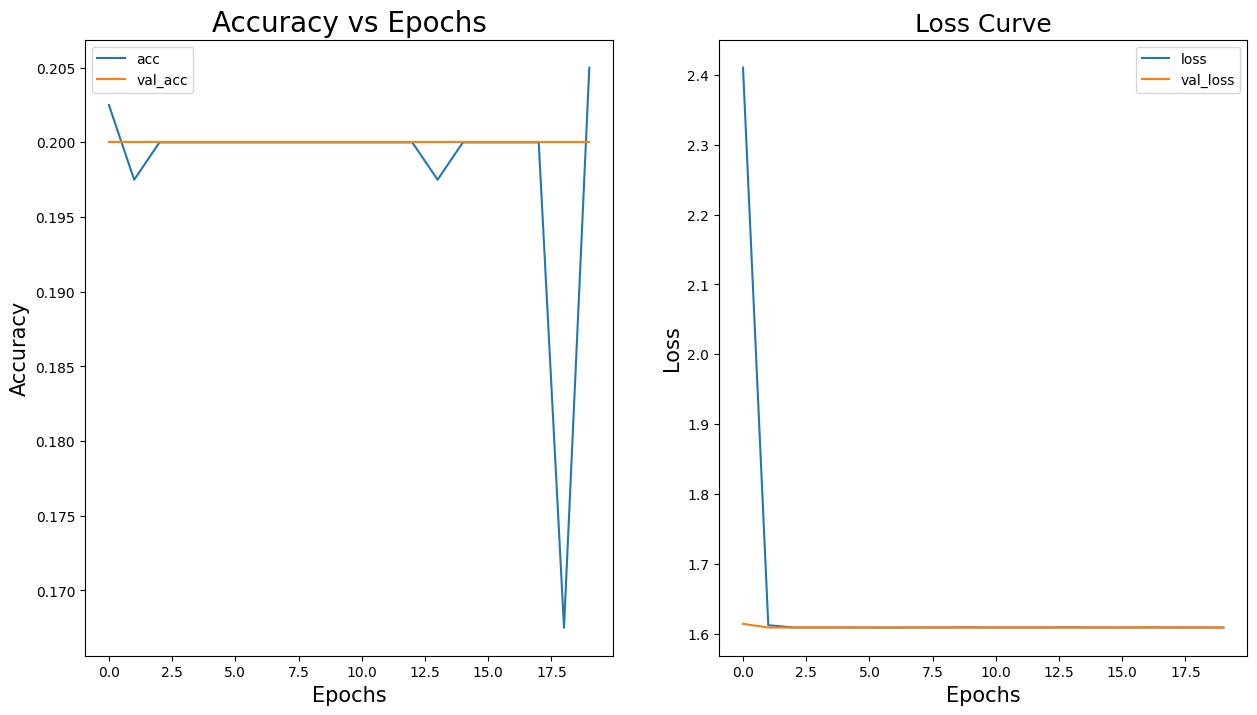

In [23]:
def model_performance_graphs():

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(hist.epoch, hist.history['accuracy'], label = 'acc')
    axes[0].plot(hist.epoch, hist.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(hist.epoch, hist.history['loss'], label = 'loss')
    axes[1].plot(hist.epoch, hist.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()

model_performance_graphs()